In [1]:
import matplotlib.gridspec as gridspec
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import Normalize, LogNorm
import matplotlib.gridspec as gridspec
import numpy as np
import matplotlib.pyplot as plt
import scqubits
from tqdm import tqdm
from IPython.display import clear_output
from functools import partial
import matplotlib


In [7]:
EJoverEC_arr = np.linspace(2,8,50)
EJoverEL_arr = np.linspace(5,50,50)

UIFQ_freq_arr = np.zeros(shape = (50,50))
HFQ_freq_arr = np.zeros(shape = (50,50))

for i,EJoverEC in tqdm(enumerate(EJoverEC_arr),desc='looping'):
    for j,EJoverEL in enumerate(EJoverEL_arr):
        EJ = 3
        EC = EJ / EJoverEC
        EL = EJ / EJoverEL
        UIFQ = scqubits.Fluxonium(EJ = EJ,EC = EJ/EJoverEC,EL = EJ/EJoverEL, cutoff =110,flux = 0,truncated_dim=4)
        evals = UIFQ.eigenvals()
        UIFQ_freq = evals[2]-evals[1]

        HFQ = scqubits.Fluxonium(EJ = EJ,EC = EJ/EJoverEC,EL = EJ/EJoverEL, cutoff = 110,flux = 0.5,truncated_dim=4)
        evals = HFQ.eigenvals()
        HFQ_freq =  evals[1]-evals[0]

        UIFQ_freq_arr[i,j] = UIFQ_freq
        HFQ_freq_arr[i,j] = HFQ_freq

looping: 50it [01:40,  2.01s/it]


In [8]:
UIFQ_freq_arr = UIFQ_freq_arr.T
HFQ_freq_arr = HFQ_freq_arr.T

In [9]:
UIFQ = scqubits.Fluxonium(EJ = EJ,EC = EJ/2,EL = EJ/50, cutoff =110,flux = 0,truncated_dim=4)
evals = UIFQ.eigenvals()
evals[2]-evals[1]

0.08089834997469669

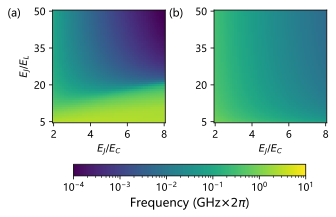

In [15]:
vmin = 1e-4
vmax = 1e1
fig = plt.figure(figsize=(5, 3)) 

w = 0.39
gs0 = fig.add_gridspec(nrows=1, ncols=1,left=0.53-w, right=0.53,bottom=0.2,top = 0.97)
gs1 = fig.add_gridspec(nrows=1, ncols=1,left=0.59, right=0.98,bottom=0.2,top = 0.97)
ax0 = fig.add_subplot(gs0[0])
ax1 = fig.add_subplot(gs1[0])
axes = [ax0,ax1]


img1 = axes[0].imshow(UIFQ_freq_arr, norm=LogNorm(vmin=vmin, vmax=vmax),origin='lower')
img2 = axes[1].imshow(HFQ_freq_arr, norm=LogNorm(vmin=vmin, vmax=vmax),origin='lower')

# Set ticks for axes[0] and axes[1]
x_ticks = np.linspace(0, len(EJoverEC_arr)-1, 4)  # Adjust the number of ticks as needed
y_ticks = np.linspace(0, len(EJoverEL_arr)-1, 4)

# Set x and y ticks based on EJoverEC_arr and EJoverEL_arr
axes[0].set_xticks(x_ticks)
axes[0].set_xticklabels([2,4,6,8])  # Rounding to 2 decimals for cleaner labels
axes[0].set_yticks(y_ticks)
axes[0].set_yticklabels([5,20,35,50])

# Repeat for axes[1] (if they have the same ticks, you can reuse the variables)
axes[1].set_xticks(x_ticks)
axes[1].set_xticklabels([2,4,6,8])
axes[1].set_yticks(y_ticks)
axes[1].set_yticklabels([5,20,35,50])


axes[0].set_xlabel(r'$E_J/E_C$')
axes[1].set_xlabel(r'$E_J/E_C$')
axes[0].set_ylabel(r'$E_J/E_L$')

cbar = fig.colorbar(img1, ax=axes, orientation='horizontal', fraction=0.07, pad=0.25)

cbar.set_label(r'Frequency (GHz$\times 2\pi$)', fontsize=12)

plt.text(-0.4, 1.02, '(a)', transform=plt.subplot(gs0[0]).transAxes, fontsize=11, va='top', color='black')
plt.text(-0.4, 1.02, '(b)', transform=plt.subplot(gs1[0]).transAxes, fontsize=11, va='top', color='black')
fig.savefig('ef_frequency_scaling_heatmap.pdf')


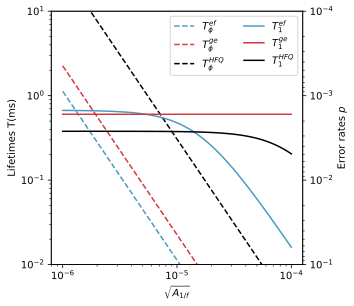

In [7]:


fig,ax = plt.subplots(1,1,figsize=(5, 4.3)) 

for i in []
ax.plot(UIFQ_freq_arr, UIFQ_Tphi_array, color= '#4999c3',label = rf'$T_\phi^{{ef}}$',linestyle='--')
ax.plot(array_of_one_over_f_flux_noise_amplitude, IFQ_Tphi_array, color= '#d5373d',label = rf'$T_\phi^{{ge}}$',linestyle='--')
ax.plot(array_of_one_over_f_flux_noise_amplitude, conventional_Tphi_array, color= 'black',label = rf'$T_\phi^{{HFQ}}$',linestyle='--')

ax.plot(array_of_one_over_f_flux_noise_amplitude, UIFQ_T1_array, color= '#4999c3',label = rf'$T_1^{{ef}}$',linestyle='-')
ax.plot(array_of_one_over_f_flux_noise_amplitude, IFQ_T1_array, color= '#d5373d',label = rf'$T_1^{{ge}}$',linestyle='-')
ax.plot(array_of_one_over_f_flux_noise_amplitude, conventional_T1_array, color= 'black',label = rf'$T_1^{{HFQ}}$',linestyle='-')

ymin = 1e-2
ymax = 1e1
ax.set_ylim(ymin, ymax)
ax.set_yscale('log')
ax.set_xlabel(r'$\sqrt{A_{1/f}}$')
ax.set_ylabel(r'$\omega$')
ax.legend(ncol = 2,loc='upper right')

fig.savefig('ef_frequency_scaling.pdf')
